In [2]:
# Dataset: Amazon Books Reviews
# Author: Mohamed Bekheet
# Source: Mohamed Bekheet. (2022). Amazon Books Reviews [Data set]. Kaggle. https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
# This dataset contains 2 files
# The first file** reviews** file contain feedback about 3M user on 212404 unique books the data set is 
# part of the Amazon review Dataset it contains product reviews and metadata from Amazon, including 
# 142.8 million reviews spanning May 1996 - July 2014.
# Reviews Dataset Data Dictionary:
# -id:                  The Id of Book
# -Title:   	        Book Title
# -Price:               The price of Book
# -User_id:             Id of the user who rates the book
# -profileName:         Name of the user who rates the book
# -review/helpfulness:  helpfulness rating of the review, e.g. 2/3
# -review/score:        rating from 0 to 5 for the book
# -review/time:         time of given the review
# -review/summary:      the summary of a text review
# -review/text:         the full text of a review

# The second file Books Details file contains details information about 212404 unique books it file is built by using
# google books API to get details information about books it rated in the first file
# and this file contains

# Book Details Dataset Data Dictionary:
# Title:	        Book Title
# Descripe:	        Decription of book
# authors:	        Name of book authors
# image:	        Url for book cover
# previewLink:	    Link to access this book on google Books
# publisher:	    Name of the publisheer
# publishedDate:	The date of publish
# infoLink:	        Link to get more information about the book on google books
# categories:	    Genres of books
# ratingsCount:	    Averaging rating for book

# Both Datasets are linked through the unique tittle of the book.

In [3]:
# Step 0. Load libraries and custom modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from dateutil.parser import parse
from datetime import datetime
# ------------  PREPROCESING -------------
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#-------------- TRANSFORMERS --------------
import transformers
from transformers.pipelines import PIPELINE_REGISTRY
from transformers import pipeline
import evaluate
from evaluate import load
from transformers import Conversation
transformers.logging.set_verbosity_error()

/home/arnaldochm/Documents/BootCamp_DataScience/Final_Project/final_project_nlp/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-02 20:55:54.563305: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-02 20:55:54.590726: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 20:55:54.726360: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 20:55:54.728196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimize

In [4]:
#Loading the Datasets
df_rating_raw = pd.read_csv('../data/raw/Books_rating.csv')

df_rating_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [5]:
df_rating_raw[df_rating_raw['Title'] == 'West Side story']

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
1814312,B000711OZC,West Side story,NaN,A3FV7U97W17PK,"M. Chaerani ""music sheet collector""",26/26,5.0,1145491200,Great transcription of the full score,If you're looking for a faithful translation f...
1814313,B000711OZC,West Side story,NaN,A14ES1GLFF6RZ9,"The Pianoman ""Producer/Arranger""",6/7,5.0,1189987200,West Side Vocal Score,If you want to play/arrange/orchestrate or sim...
1814314,B000711OZC,West Side story,NaN,APYTEBHJXFT18,Teen,4/5,4.0,1167177600,For the intermediate,The book is medium-it isn't an easy book you o...
1814315,B000711OZC,West Side story,NaN,A3H9EZYOVG81TW,Broadway Fan,1/1,5.0,1332374400,West Side Story,This book is perfect. We are rehearsing West S...
1814316,B000711OZC,West Side story,NaN,A1IWMVQGALYNVK,C. Morgan,3/4,5.0,1199145600,High Quality Printing,The piano and vocals are clearly printed which...
1814317,B000711OZC,West Side story,NaN,AZUS7ZIZWEJ0B,"Rebecca L. Gosselin ""Capegirl78""",0/0,5.0,1355702400,Fab!,this was perfect - I wanted to real versions o...
1814318,B000711OZC,West Side story,NaN,A1F2FPNK5VBJZ4,"W. Smith ""Future Tony Winner""",0/0,5.0,1264636800,A Composer/Orchestrator's Best Friend,My original intention was to buy this and use ...
1814319,B000711OZC,West Side story,NaN,A2DGD1PGXR5BZM,Olivertrst,0/1,3.0,1319241600,Disappointed -- Bent in shipping,I was disappointed when I received this book i...
1814320,B000711OZC,West Side story,NaN,A1GURUV4HPAWFU,Krista Cronin,2/9,5.0,955411200,West Side Story is Fabulous,"The music from West Side Story is captivating,..."


In [6]:
df_rating_raw.sample(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2220901,B000J9Z3TA,The Princess Diaries,NaN,NaN,NaN,15/28,1.0,977961600,Maybe it's just me...,...But I didn't like this book. It wasn't at a...
934963,0937822612,Clinker Plywood Boatbuilding Manual,18.96,A2VO5X36DIK77Q,Robert Ayliffe,5/5,5.0,1011139200,Clinker Plywood Boat Building Manual,"The 'workshop index', whereby you simply fan t..."
344989,B0006VYG62,The Bell Jar : A Novel (Perennial Classics),NaN,AH3MQLUMCGC8U,DPublico,0/1,5.0,1358294400,A Classic,I picked this book up because I knew it'd been...
922713,B000FLCR0U,The Book of Mormon Another Testament of Jesus ...,NaN,ASIHWW9R7QKIA,Mike S. Hansen,16/20,5.0,1104710400,Excellent Book!,I have studied ancient American civilizations ...
2450335,B000GRMG5O,Mere Christianity,NaN,NaN,NaN,2/4,5.0,935625600,Christianity in a Nutshell,Lewis starts off sharing strong evidence that ...
2676504,055321411X,Evelina,NaN,AHE015C34AYG3,J. Titak,0/0,5.0,1360108800,Beautiful Story,I love this book. I read it in a world women's...
2183886,0670847755,Mr. Lunch Takes a Plane Ride,NaN,A2DIBFS14QMK51,Will B Bell,3/5,4.0,946166400,Picasso for the preschool set,I just love the style of this illustrator. The...
859511,0976570904,"The Official Guide for GMAT Review, 11th Edition",NaN,AP1SUPBLK1M21,RG,188/189,5.0,1174348800,An absolute must for any GMAT Prep,"This book, coupled with the Official GMAT Verb..."
2936043,B000NUGZGU,A Factory of Cunning: A Novel,NaN,A2I302SM3XB3GA,Searching for the Perfect Phrase,6/7,3.0,1118966400,Could've Been Better,"Firstly, it appears that most readers are fami..."
252213,B000FDK7H8,Over the Moon at the Big Lizard Diner (Texas H...,NaN,A221HN67KU3VLV,Movie Nut Deb,0/0,5.0,1311811200,Great and funny read.,I read this book about 1 year ago and I still ...


In [7]:
#Load Books Data Dataset
df_data_raw = pd.read_csv('../data/raw/books_data.csv')

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [8]:
df_data_raw.sample(10)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
9816,Walt Disney's Alice Favorites,A collection of stories about the adventures o...,NaN,NaN,http://books.google.nl/books?id=Lia2swEACAAJ&d...,NaN,1973,http://books.google.nl/books?id=Lia2swEACAAJ&d...,"[""Children's stories""]",NaN
44179,Where is Jesus Now?: And What is He Doing? - A...,This work by David Pawson explores the subject...,['David Pawson'],NaN,http://books.google.com/books?id=SKjVAAAACAAJ&...,NaN,2001-03,http://books.google.com/books?id=SKjVAAAACAAJ&...,NaN,NaN
146755,White Deer,A Latvian tale of two brothers in search of an...,NaN,NaN,http://books.google.com/books?id=e0rWvgEACAAJ&...,NaN,1973,http://books.google.com/books?id=e0rWvgEACAAJ&...,['Brothers'],NaN
108499,10 Most Common Chess Mistakes,Grandmaster Larry Evans draws upon his vast ex...,['Larry Evans'],http://books.google.com/books/content?id=UcIHA...,http://books.google.com/books?id=UcIHAAAACAAJ&...,Cardoza,2002-09-17,http://books.google.com/books?id=UcIHAAAACAAJ&...,['Games'],NaN
164786,A Life in Pieces: The Making and Unmaking of B...,The story of a faked Holocaust memoir by Binja...,['Blake Eskin'],http://books.google.com/books/content?id=ybTl3...,http://books.google.com/books?id=ybTl3zQJNW0C&...,W. W. Norton & Company,2003-05-27,http://books.google.com/books?id=ybTl3zQJNW0C&...,['Biography & Autobiography'],NaN
19489,Coincidence of Memory,"A collection of photography, poetry and art.",['Viggo Mortensen'],http://books.google.com/books/content?id=20oIS...,http://books.google.nl/books?id=20oISwAACAAJ&d...,NaN,2003-02-01,http://books.google.nl/books?id=20oISwAACAAJ&d...,['Art'],NaN
124155,Epochs and Styles: Selected Writings on the Ne...,11 essays were previously published in Swedish...,['Albert Wifstrand'],http://books.google.com/books/content?id=GTwfo...,http://books.google.nl/books?id=GTwfoIkLN2MC&p...,Mohr Siebeck,2005,http://books.google.nl/books?id=GTwfoIkLN2MC&d...,['Religion'],NaN
164656,Instant Java,Here's everything Web authors need to add Java...,"['John A. Pew', 'Stephen G. Pew']",http://books.google.com/books/content?id=eIs_A...,http://books.google.com/books?id=eIs_AQAAIAAJ&...,Prentice Hall Ptr,1999,http://books.google.com/books?id=eIs_AQAAIAAJ&...,['Computers'],1.0
133169,A small upright spinning wheel construction ma...,NaN,"['Richard C. Schneider', 'Myrna Schneider']",NaN,http://books.google.com/books?id=-R_5PwAACAAJ&...,NaN,1979,http://books.google.com/books?id=-R_5PwAACAAJ&...,['Spinning-wheel'],NaN
109148,50 Years of the Desert Boneyard: Davis Monthan...,50 Years of the Desert Boneyard Chinnery Subti...,['Philip D. Chinnery'],http://books.google.com/books/content?id=Nl8HA...,http://books.google.com/books?id=Nl8HAAAACAAJ&...,Motorbooks,1995,http://books.google.com/books?id=Nl8HAAAACAAJ&...,['History'],NaN


In [9]:
#Revisar Valores Nulos
df_rating_raw.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64

In [10]:
df_data_raw.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [11]:
#Innecesary Columns are removed
# df_rating: 
#   - Price: Almost 84% of the entries are null. 
#   - profileName: User_id provides same information.
#   - Id: Innecesary column.
#   - review/summary: Unncesary column for current analysis. Many summaries used are the same Book Title.  
# df_data:
#   - image, previewLink, infoLink: Not useful information.
#   - ratingsCount: Information from Google API. Not useful for the analysis.
#   - description: Non necesary information for Analysis

df_rating_processed = df_rating_raw.drop(['Id','profileName','Price','review/summary'], axis=1).copy()
df_data_processed = df_data_raw.drop(['image','previewLink','infoLink','ratingsCount','description'], axis=1).copy()

In [12]:
df_rating_processed.sample(10)

,Title,User_id,review/helpfulness,review/score,review/time,review/text
1546570,Blood Red Roses,NaN,0/0,5.0,908755200,&quot;Blood Red Roses&quot; surpasses the firs...
2808810,A book of nonsense (Looking glass library),AEB63NB5CZ9TR,1/2,1.0,1270080000,I am very disappointed in this book. When I lo...
2249466,Speaker for the Dead,A5QE1XX7SM97G,0/0,5.0,1151625600,Speaker for the Dead can hardly be considered ...
2310879,Women,AT6CZDCP4TRGA,6/7,5.0,1049328000,"Bukowski at his best: totally flowing, laid-ba..."
387224,The Pan-G Non-Surgical Face Lift: Bodybuilding...,ABFM5565NTPG2,14/14,1.0,1278892800,I personally agree with the other two reviews....
1985852,Emily Climbs,NaN,5/5,5.0,942537600,This is the best book in the Emily series. Mos...
2998440,Jane Eyre,A3O7BS6DLZ951P,0/0,5.0,1209859200,This was an adorable little book that was very...
1185691,The Ultimate Pizza : The World's Favorite Pizz...,NaN,3/3,5.0,873849600,"As an avid collector of cookbooks, and a gourm..."
1317111,The Bible Answer Book,A3NFZSDLV0AE6W,9/50,1.0,1140739200,I wish I could return this book and its audio ...
2703926,Busman's Honeymoon,A1IA649OZOQYU9,0/0,5.0,1361145600,Lovely timeless classic murder story and livel...


In [13]:
df_rating_processed = df_rating_processed.rename(columns={'Title':'title', 
                                                        'User_id':'user_id',
                                                        'review/helpfulness': 'helpfulness',
                                                        'review/score': 'review',
                                                        'review/time': 'review_time',
                                                        'review/text': 'text'
                                                        })
df_data_processed = df_data_processed.rename(columns={'Title':'title', 
                                                        'publishedDate':'published_date'
                                                        })

In [14]:
df_rating_processed.isna().sum()

title             208
user_id        561787
helpfulness         0
review              0
review_time         0
text                8
dtype: int64

In [15]:
df_data_processed.isna().sum()

title                 1
authors           31413
publisher         75886
published_date    25305
categories        41199
dtype: int64

In [16]:
#CLEAN THE DATASETS

In [17]:
#As both datasets are going to be merged by Title, Rows with Null Title are removed.
df_rating_processed = df_rating_processed.dropna(subset=['title', 'text'], how='any')

df_data_processed = df_data_processed.dropna(subset=['title'])

#Drop rows where everything except title is null
df_data_processed = df_data_processed.dropna(subset=['authors', 'publisher', 'published_date', 'categories'], how='all')

In [18]:
df_data_processed.sample(5)

,title,authors,publisher,published_date,categories
9401,The Cloud of Unknowing,['William Johnston'],Image,2012-01-11,['Religion']
133482,Snow Angel (Book with Charm),['Sandy Winnette'],NaN,2008-08-04,['Humor']
159971,You Can't Afford the Luxury of a Negative Thought,"['John Roger', 'John-Roger McWilliams', 'Peter...",HarperCollins UK,2001,['Self-actualization (Psychology)']
17591,21204 MATH CONNECTIONS HIGH SCHOOL,NaN,NaN,2005,['Education']
80764,"Finally, Love (Heartsong Presents #222)",['Jill Stengl'],NaN,1997,['Christian fiction']


In [19]:
# Found 143 published_date entries with the format YYYY*
# Found 76 published_date entries with the format YYY?
# Found 52 published_date entries with the format YY??

def convert_to_year(date_in):    
    try:    
        patern_1 = r'\d\d\d\?'
        patern_2 = r'\d\d\?\?'

        #Some dates only contain the Year with the format YYYY*. For those cases, the symbol * is removed.
        date = date_in.replace('*', '')

        #Other cases contains an ? symbol instead of a number on the Year. YYY? or YY??
        #For this specific case, the rounded mean from 0 to 9 is used: 5
        if re.match(patern_1, date):
            date = date.replace('?', '5')

        if re.match(patern_2, date):
            return None

        date = parse(date)
        
        return date.strftime("%Y")
    except:        
        return None

In [20]:
#Use only the year for published_date
df_data_processed['published_year'] = df_data_processed['published_date'].apply(lambda x: convert_to_year(x) if pd.notna(x) else x)

df_data_processed['published_year'] = df_data_processed['published_year'].fillna('0')

df_data_processed['published_year'] = df_data_processed['published_year'].astype('int32')

#Drop published_date column 
df_data_processed = df_data_processed.drop(['published_date'], axis=1)

In [21]:
mean_published_year = int(df_data_processed['published_year'].mean())
mean_published_year

1981

In [22]:
df_data_processed['published_year'] = df_data_processed['published_year'].apply(lambda x: mean_published_year if x==0 else x)
df_data_processed.sample(10)

,title,authors,publisher,categories,published_year
163209,Ancient Light: Our Changing View of the Universe,['Alan P. Lightman'],Harvard University Press,['Science'],1993
51449,Feminine Wiles: Creative Techniques for Writin...,['Donna Elizabeth Boetig'],Quill Driver Books,['Language Arts & Disciplines'],1998
39680,Origami Animals,['Fumiaki Shingu'],Tuttle Publishing,['Crafts & Hobbies'],2020
75632,The New Corporate Finance: Where Theory Meets ...,['Donald H. Chew'],McGraw-Hill Companies,['Corporations'],1993
100183,The Wisdom of the Overself,['Paul Brunton'],North Atlantic Books,"['Body, Mind & Spirit']",2015
199946,Cliffsquickreview Calculus: Anton/Bivens/Davis...,"['Bernard V. Zandy', 'Jonathan J. White']",Cliff Notes,['Mathematics'],2003
5409,Nell,['Alexander P. M. van den Bosch'],Lulu.com,NaN,2017
118054,The real diary of a real boy,['Henry A. Shute'],Applewood Books,['Fiction'],2001
34435,History Will Not Absolve Us : Orwellian Contro...,['E. Martin Schotz'],"Kurtz, Ulmer & Delucia",['History'],1996
71952,The Keeping Days,['Steven M. Stowe'],UNC Press Books,['History'],2018


In [23]:
def custom_string_to_list(s):
    if isinstance(s, str):
        return [item.strip(" '[]") for item in s.split(',')]
    else:
        return s

In [24]:
#Updating the Authors to a list.
#Updating Categories to list
df_data_processed['authors'] = df_data_processed['authors'].apply(custom_string_to_list)
df_data_processed['categories'] = df_data_processed['categories'].apply(custom_string_to_list)

In [25]:
df_data_processed.sample(10, random_state=20)

,title,authors,publisher,categories,published_year
134060,Galois theory;: Lectures delivered at the Univ...,[Emil Artin],Courier Corporation,[Mathematics],2012
2306,The Sunday Tertulia: A Novel,[Lori Marie Carlson],Harper Collins,[Fiction],2009
49270,Suddenly They're 13,[David and Claudia Arp],Zondervan,[Religion],2010
115253,BEYOND MONSTERS AND CLOWNS. THE COMBAT SS. : D...,[Karl H. Theile],University Press of Amer,[History],1997
120696,Virginians at home: Family life in the eightee...,[Edmund Sears Morgan],Colonial Williamsburg Foundation,[History],1952
194758,Food Choice and Obesity in Black America: Crea...,[Eric J. Bailey],Greenwood Publishing Group,[African Americans],2006
10043,Lake Geneva in Vintage Postcards (WI) (Postcar...,"[Carolyn Hope Smeltzer, Martha Kiefer Cucco]",Arcadia Publishing,[History],2005
16651,"Where Are You Going, Manyoni?",[Catherine Stock],Harpercollins Childrens Books,[Juvenile Fiction],1993
61146,Twenty One Days to a Trained Dog,"[Dick Maller, Jeffrey Feinman]",Simon and Schuster,[Pets],1979
55622,"The German campaigns in the Balkans (spring, 1...",[George E. Blau],NaN,"[World War, 1939-1945]",1986


In [26]:
df_rating_processed.sample(5)

,title,user_id,helpfulness,review,review_time,text
2514718,"Look Homeward, Angel: A Play",A1ALVTBS2UO10,0/0,5.0,1359504000,Magnificent author - thrilled to discover his ...
1623931,Men of iron,A1ZN9K0WZVH04W,0/0,4.0,1347062400,This book was purchased for my son to read for...
93120,The Shelters Of Stone - The Earth's Children S...,AN0UEUQL5X222,6/8,5.0,1021334400,"I have read her other 4 books in this series, ..."
2020521,Slaughter-House Five,AO8WJRQ3NHWRU,0/0,5.0,1354406400,Joel Witt and co.AP LIT Group Book Review: Eva...
1182147,Bleak House,A3HR6R1L4O97SK,7/8,4.0,1265587200,It isn't the text -- that's brilliant. Ms. Hol...


In [27]:
# CLEANING DATA FOR REVIEWS DATASET
df_rating_processed['review_year'] = df_rating_processed['review_time'].apply(lambda x: datetime.utcfromtimestamp(x).year)

df_rating_processed = df_rating_processed.drop(['review_time'], axis=1)

In [28]:
df_rating_processed.sample(10)

,title,user_id,helpfulness,review,text,review_year
1220407,Prince Caspian : The Return to Narnia,NaN,1/1,4.0,Prince Caspian is the fourth book out of the s...,2008
2930125,Speaker for the Dead,A2VJ5ALN1BIV3B,0/0,5.0,I've read each book in this series and they al...,2012
526050,Harry Potter and The Sorcerer's Stone,NaN,0/0,5.0,*I read this book in two days. It was so good ...,1999
1269758,The Boys' Crusade: The American Infantry in No...,A1UWQM2DDOHXCM,4/8,4.0,By tying together a series of short essays on ...,2003
2205631,Betty Crockers Cooky Book (1st Edition),A128O3YOP47CE3,1/2,5.0,This is a darling book for anyone that likes t...,2006
1893295,Treat Your Own Back,A2LVLNG7D4ZK9S,0/0,5.0,i purchased this book as i had read about it o...,2012
2943714,The Hobbit,AMZH4WPSSYJ8U,1/2,5.0,I read this for the first time at the age of 3...,2012
2610384,Ordinary People.,A2O7I861W0OHR3,1/1,5.0,Few novels dare to break the conventional idea...,2003
975126,The Screwtape letters,A229G1MPDFKLGG,2/3,5.0,This is a classic piece of Christian fiction. ...,2002
2748657,The call of the wild,NaN,1/2,4.0,This book was mind envigorting and scintytilat...,2006


In [29]:
#Changing helpfulness to a porcentual value
def get_helpfulness_as_porcentual_value_0(x):
    if  x == '0/0':
        return 0
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor
    
def get_helpfulness_as_porcentual_value_1(x):
    if  x == '0/0':
        return 1
    elif x.split('/')[0] == '0':
        return 0
    else:
        dividend = int(x.split('/')[0])
        divisor = int(x.split('/')[1])
        return dividend/divisor

In [30]:
df_rating_processed['helpfulness_0'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_0(x))
df_rating_processed['helpfulness_1'] = df_rating_processed['helpfulness'].apply(lambda x: get_helpfulness_as_porcentual_value_1(x))
df_rating_processed = df_rating_processed.drop(['helpfulness'], axis=1)

In [31]:
df_rating_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1
160048,Jane Eyre,A3KEDJHFJDH988,5.0,Saw the movie and wanted to read the book. I b...,2012,0.000000,1.000000
2937060,Bauhaus: 1919-1933 (Big Series Art),A1ER5AYS3FQ9O3,4.0,If you want a comprehensive historical informa...,2006,1.000000,1.000000
2991924,Up from Slavery,AJTV7VODO7O4R,5.0,This classic is full of inspiration. It should...,2013,0.000000,1.000000
2937387,Coyote Blue,A111W7WHB093J4,5.0,Christopher Moore is my favorite author and th...,1997,0.916667,0.916667
1360686,Looking for Alaska,A2WNS6UTZW21UP,5.0,I just finished reading Looking for Alaska. My...,2002,1.000000,1.000000
582294,Five People You Meet in Heaven,A1RDFR31P04UTO,4.0,I thought this was a great book. Very meaningf...,2004,0.333333,0.333333
1741190,C: A Reference Manual (5th Edition),NaN,3.0,"This is a very complete book, but unfortunatel...",2002,0.838710,0.838710
2471470,On the Road,NaN,5.0,I read this book at the advice of my father an...,1998,0.000000,1.000000
1041402,Effective Helping: Interviewing and Counseling...,A173KO568OZOW3,1.0,The Kindle version of this book is awfully. Th...,2011,1.000000,1.000000
411406,The Hobbit,AZQ4MKXV62RYB,5.0,If you love adventure or just a fantastic stor...,2010,0.000000,1.000000


In [32]:
#Merge The Two Datasets.
df_all_data_processed = pd.merge(df_rating_processed, df_data_processed, on='title', how='inner')
df_all_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666314 entries, 0 to 2666313
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   title           object 
 1   user_id         object 
 2   review          float64
 3   text            object 
 4   review_year     int64  
 5   helpfulness_0   float64
 6   helpfulness_1   float64
 7   authors         object 
 8   publisher       object 
 9   categories      object 
 10  published_year  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 223.8+ MB


In [33]:
df_all_data_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
438177,Ella Enchanted,A2SJWZJ8M0RQN9,5.0,"In a world filled with superfluous novels, anc...",2007,0.923077,0.923077,[Gail Carson Levine],Harper Collins,[Juvenile Fiction],2012
1566960,Gone with the Wind,NaN,5.0,Gone With the Wind is one of the best books ev...,1999,1.000000,1.000000,[Margaret Mitchell],Random House,[Fiction],2020
2356459,The All New All Purpose: Joy of Cooking,A3UEOLHXX7DGNU,4.0,The &quot;Joy of Cooking&quot; (affectionately...,2002,0.117647,0.117647,"[Irma S. Rombauer, Marion Rombauer Becker, Eth...",Simon and Schuster,[Cooking],1997
1761178,Poor Leo's 2002 Computer Almanac,A3W4YAO8K5M9VE,5.0,I actually found your book at my local B&amp;N...,2001,0.818182,0.818182,[Leo Laporte],TechTV,[Computers],2001
2663745,You Just Don't Understand,NaN,5.0,Deborah Tannen's &quot;You Don't Understand&qu...,2000,0.928571,0.928571,"[Deborah Tannen, Professor of Linguistics Debo...",Ballantine Books,[Psychology],1991
703750,The complete novels of Jane Austen,A2SWKKTQCM2SJO,5.0,The Complete Novels of Jane Austen is a good b...,2009,1.000000,1.000000,[Jane Austen],Simon and Schuster,[Fiction],2019
1914198,River of the Brokenhearted,A2BH0U2473VGMJ,5.0,Wonderful book - well written. The book was a ...,2012,0.000000,1.000000,[David Adams Richards],Simon and Schuster,[Fiction],2014
489976,Wuthering Heights (New Windmill),NaN,5.0,Since the age of 17 I have read this novel 6 t...,1999,0.000000,1.000000,[Emily Brontë],NaN,[Foundlings],1994
1023950,GEEK LOVE.,A30Q66K2H7G0OO,3.0,Rating: 3.25* of fiveThe Book Report: I don't ...,2012,0.500000,0.500000,[Katherine Dunn],Vintage,[Fiction],2011
821973,The desert year (Viking compass edition),AQE41QO3NEUMW,5.0,"Written over 50 years ago, this classic book o...",2003,1.000000,1.000000,[Joseph Wood Krutch],NaN,[Desert animals],1969


## Dataset Reduction/Sampling

Sample Size Calculation formula from Survey Monkey (https://www.surveymonkey.com/mp/sample-size-calculator/) is used to calculate a extract a ramdom sample of the dataset.
In order to reduce the dataset size and apply NLP to the text column.

For the given formula: 

   $$ sample size =  \frac{\frac{z^2xp(1-p)}{e^2}}{1 + \frac{z^2xp(1-p)}{e^2N}} $$

with:
- N = population size 
- e = Margin of error (percentage in decimal form) 
- z = z-score
- p = sample proportion


| Desired confidence level	| z-score |
|--------------------------|---------|
|            80%           |   1.28  |
|            85%	         |   1.44  |
|            90%	         |   1.65  |
|            95%	         |   1.96  |
|            99%	         |   2.58  |


Setting N = 2 666 313, e = 99% and z = 2.58

sample size = 578995. 

A sample of **578 995** entries will be extracted from the Dataset to be processed and to train and test the model.

In [57]:
N = df_all_data_processed.shape[0] - 1
e = 0.0015 #Margin of error = 0.15%
z = 2.58 # Desired confidence level = 99%, so z-score = 2.58
p = 0.5 #Used 0.5 as a conservative approach. It will give the largest sample size

sample_size = ( ((z*z)*p*(1-p))/(e*e) )/(1 + ((z*z)*p*(1-p))/(e*e*N) )

sample_size = round(sample_size)

print(f'Sample size is: {sample_size}')

Sample size is: 578995


In [88]:
#Extract the sample of 578995 entries from the dataset.
df_all_data_filtered_processed = df_all_data_processed.sample(n=sample_size, random_state=2125)

In [89]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578995 entries, 0 to 578994
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           578995 non-null  object 
 1   user_id         470719 non-null  object 
 2   review          578995 non-null  float64
 3   text            578995 non-null  object 
 4   review_year     578995 non-null  int64  
 5   helpfulness_0   578995 non-null  float64
 6   helpfulness_1   578995 non-null  float64
 7   authors         566598 non-null  object 
 8   publisher       481622 non-null  object 
 9   categories      531722 non-null  object 
 10  published_year  578995 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 48.6+ MB


In [90]:
df_all_data_filtered_processed['review'].value_counts()

review
5.0    349011
4.0    113195
3.0     48855
1.0     38541
2.0     29393
Name: count, dtype: int64

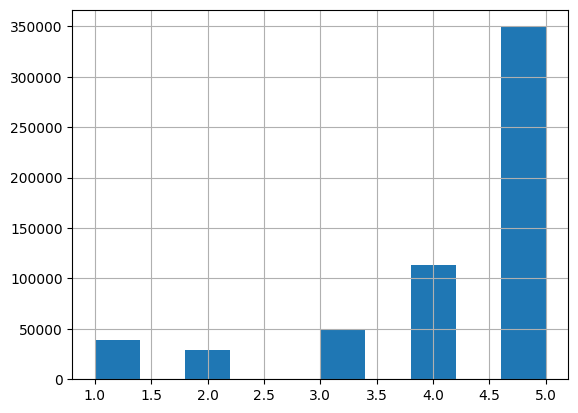

In [91]:
df_all_data_filtered_processed['review'].hist()
plt.show()
#Add axes.

In [92]:
df_all_data_filtered_processed.isna().sum()

title                  0
user_id           108276
review                 0
text                   0
review_year            0
helpfulness_0          0
helpfulness_1          0
authors            12397
publisher          97373
categories         47273
published_year         0
dtype: int64

In [93]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
477394,The High King,NaN,5.0,I think that everyone should read this series....,1999,0.666667,0.666667,[Lloyd Alexander],Usborne Publishing Ltd,[Juvenile Fiction],2014
392044,Faerie Wars (Faerie Wars Chronicles),AS74J5KP9B0IT,5.0,I found this book to be an excellent read. You...,2006,0.952381,0.952381,[Herbie Brennan],A&C Black,[Juvenile Fiction],2011
87415,Fox's Book of Martyrs,A3N48NHTSIIJ1,5.0,The Bible states that our LORD is the same yes...,2005,0.777778,0.777778,[John Foxe],Bridge Logos Foundation,[Religion],2001
387818,Home Life in Colonial Days,AZEUTE10AH2NR,5.0,This hundred-year-old work retains its vitalit...,1998,0.976744,0.976744,[Alice Morse Earle],Pelican Publishing,[Economie domestique],1898
402942,Music for Chameleons,A3PGPCL2NM5D2,5.0,This collection of short stories by Truman Cap...,2006,0.750000,0.750000,[Truman Capote],Vintage,[Fiction],1994
246270,Body Rx: Dr. Scott Connelly's 6-Pack Prescription,A2C524BLZH2VG7,5.0,I work during the day and go to school at nigh...,2001,0.846154,0.846154,"[A. Scott Connelly, Carol Colman]",Berkley Publishing Group,[Health & Fitness],2002
110276,The Truth: Discworld #25,AUTBHG6070SL4,4.0,And William de Worde sets out to become the ve...,2005,0.000000,1.000000,[Terry Pratchett],Random House,[Fiction],2008
350114,Little Women,A24E5JIRUSYODU,5.0,Every year I give my eleven year old daughter ...,2012,0.000000,1.000000,[Louisa May Alcott],Lindhardt og Ringhof,[Fiction],2018
494803,An actor prepares,A1IWY8H9NRL9K6,5.0,I found &quot;An Actor Prepares&quot; to be a ...,2002,0.888889,0.888889,[Constantin Stanislavski],A&C Black,[Performing Arts],2013
445262,The Big Sleep,A3P4S2XYTZ880I,5.0,"Considering the time this was written, any aut...",2012,0.000000,1.000000,[Raymond Chandler],Harper Collins,[Fiction],2013


In [94]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop_duplicates(subset=['title','user_id', 'review', 'text'])
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552641 entries, 0 to 552640
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           552641 non-null  object 
 1   user_id         449141 non-null  object 
 2   review          552641 non-null  float64
 3   text            552641 non-null  object 
 4   review_year     552641 non-null  int64  
 5   helpfulness_0   552641 non-null  float64
 6   helpfulness_1   552641 non-null  float64
 7   authors         540414 non-null  object 
 8   publisher       458732 non-null  object 
 9   categories      510313 non-null  object 
 10  published_year  552641 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 46.4+ MB


In [95]:
df_all_data_filtered_processed.sample(10)

,title,user_id,review,text,review_year,helpfulness_0,helpfulness_1,authors,publisher,categories,published_year
274710,Final Fantasy Origins Official Strategy Guide,A2ZP4PRR6VT6ZG,5.0,This strategy guide met all of my expectations...,2003,1.000000,1.000000,"[Casey Loe, Laura M. Parkinson]",Brady,[Games],2003
492034,A cry in the jungle bar (Picador fiction),AL277B4AQCWBG,4.0,This is one of several Australian novels from ...,2003,0.000000,1.000000,[Robert Drewe],NaN,NaN,1988
102138,The Talisman,NaN,5.0,This book takes all the things you once believ...,1999,0.000000,1.000000,"[Stephen King, Peter Straub]",Gallery Books,[Fiction],2018
263968,Still Lake,A3TINKDXNBDADE,2.0,"First, let me say that Anne Stuart has written...",2002,0.500000,0.500000,[Anne Stuart],Harlequin,[Fiction],2012
412241,Economics in one lesson,ADJXL0W0RJ7VV,5.0,"In fact, I think most economists need to read ...",2003,0.764706,0.764706,[Henry Hazlitt],Currency,[Business & Economics],2010
104496,Unfit for Command: Swift Boat Veterans Speak O...,A3AT63GA15W0MW,5.0,My first suspicion was that Unfit for Command ...,2004,0.625000,0.625000,[BusinessNews Publishing],Primento,[Political Science],2017
52938,Murder on the Orient Express: A Hercule Poirot...,A3GRN6J64F2C3X,4.0,"""Murder on the Orient Express"" is a clean, fas...",2007,0.666667,0.666667,[Agatha Christie],Harper Collins,[Fiction],2011
61447,Harper Lee's To Kill a Mockingbird (Barron's B...,A3OKZ1ESID9NBC,5.0,I read To Kill A Mockingbird. This book was ab...,2001,0.000000,0.000000,"[Joyce Milton, Harper Lee]",Turtleback Books,[Juvenile Nonfiction],1984
117701,The Lorax (Turtleback School & Library Binding...,AXJTAM46RB7I5,5.0,"In short, Dr. Seuss just change my life. My gi...",2011,0.000000,1.000000,[Tish Rabe],Random House Books for Young Readers,[Juvenile Fiction],2012
106408,The Things We Do for Love (Brilliance Audio on...,A3HT9OD0MZ1123,4.0,I think Kristin Hannah writes well and I enjoy...,2013,0.000000,1.000000,[Kristin Hannah],"Random House Digital, Inc.",[Fiction],2010


# Final Preprocesing from EDA Findings

## Helpfulness Outliers

During the EDA, it was discovered two entries Outliers for helpfulness column with helpfulness = 2

In [96]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    552641.000000
mean          0.495408
std           0.430890
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           2.000000
Name: helpfulness_0, dtype: float64

In [97]:
# During the EDA, it was discovered a single Outlier for helpfulness column
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    552641.000000
mean          0.788390
std           0.320185
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           2.000000
Name: helpfulness_1, dtype: float64

In [98]:
df_all_data_filtered_processed.shape

(552641, 11)

In [102]:
df_all_data_filtered_processed = df_all_data_filtered_processed.drop(df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2].index)
df_all_data_filtered_processed[df_all_data_filtered_processed['helpfulness_0'] == 2]['helpfulness_0'].value_counts()

Series([], Name: count, dtype: int64)

In [106]:
df_all_data_filtered_processed.reset_index(drop=True, inplace=True)

In [107]:
df_all_data_filtered_processed.shape

(552639, 11)

In [108]:
df_all_data_filtered_processed['helpfulness_1'].describe().T

count    552639.000000
mean          0.788386
std           0.320177
min           0.000000
25%           0.666667
50%           1.000000
75%           1.000000
max           1.000000
Name: helpfulness_1, dtype: float64

In [109]:
df_all_data_filtered_processed['helpfulness_0'].describe().T

count    552639.000000
mean          0.495402
std           0.430882
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: helpfulness_0, dtype: float64

## Book Authors Names

During the Exploratory Data Analysis it was discovered that some authors are reviewed under diferent formats of their names. Based on this, the Dataset is simplified to contain only one name format.

In [119]:
#The examples are:
author_mapping = {
    'John Ronald Reuel Tolkien':'J. R. R. Tolkien',
    'J. R. R. Tolkien':'J. R. R. Tolkien',
    'J.R.R. Tolkien':'J. R. R. Tolkien',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith',
    'Gabriel Garcia Marquez':'Gabriel Garcia Marquez',
    'Gabriel García Márquez':'Gabriel Garcia Marquez',
    'Charlotte Brontë':'Charlotte Brontë',
    'Charlotte Bronte':'Charlotte Brontë',
    'Emily Brontë':'Emily Brontë',
    'Emily Bronte':'Emily Brontë',
    'Joseph Smith':'Joseph Smith',
    'Joseph Smith (Jr.)':'Joseph Smith',
    'Jr.':'Joseph Smith'
    }


In [120]:
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           552639 non-null  object 
 1   user_id         449139 non-null  object 
 2   review          552639 non-null  float64
 3   text            552639 non-null  object 
 4   review_year     552639 non-null  int64  
 5   helpfulness_0   552639 non-null  float64
 6   helpfulness_1   552639 non-null  float64
 7   authors         540412 non-null  object 
 8   publisher       458730 non-null  object 
 9   categories      510311 non-null  object 
 10  published_year  552639 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 46.4+ MB


In [121]:
def standardize_authors(authors):
    if isinstance(authors, list):
        return [author_mapping.get(author, author) for author in authors]
    else:
        return authors  # Return the original value if it's not a list

In [122]:
df_all_data_filtered_processed['authors'] = df_all_data_filtered_processed['authors'].apply(standardize_authors)

# Processed Datasets Saving

In [124]:
df_all_data_filtered_processed = df_all_data_filtered_processed.reset_index()
df_all_data_filtered_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552639 entries, 0 to 552638
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           552639 non-null  int64  
 1   title           552639 non-null  object 
 2   user_id         449139 non-null  object 
 3   review          552639 non-null  float64
 4   text            552639 non-null  object 
 5   review_year     552639 non-null  int64  
 6   helpfulness_0   552639 non-null  float64
 7   helpfulness_1   552639 non-null  float64
 8   authors         540412 non-null  object 
 9   publisher       458730 non-null  object 
 10  categories      510311 non-null  object 
 11  published_year  552639 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 50.6+ MB


In [125]:
#Recomendacion de Manu para procesamiento
df_all_data_filtered_processed['num_row'] = np.arange(len(df_all_data_filtered_processed))

df_reduced = df_all_data_filtered_processed[['num_row', 'text']].copy()

df_reduced.sample(10)

,num_row,text
333299,333299,Mike's book is a light-hearted tool for a pers...
162261,162261,"These books are wonderful and a ""must have"" fo..."
253602,253602,Since there are several plot summaries already...
83225,83225,What a great and beautiful story. Highly recom...
250413,250413,Lisa Gardner's thriller debut is an impressive...
184991,184991,Needless to day Garth Stein is a wonderfully t...
440020,440020,"I studied no less than four other tutorials, r..."
460501,460501,You wrote down that the children were locked i...
207461,207461,"Don't read ""Ulysses"" because of what other peo..."
110634,110634,The children's book of the same title was writ...


In [126]:
df_all_data_filtered_processed.to_csv('../data/processed/filtered_data_processed.csv')

In [127]:
df_reduced.to_csv('../data/processed/df_reduced.csv')